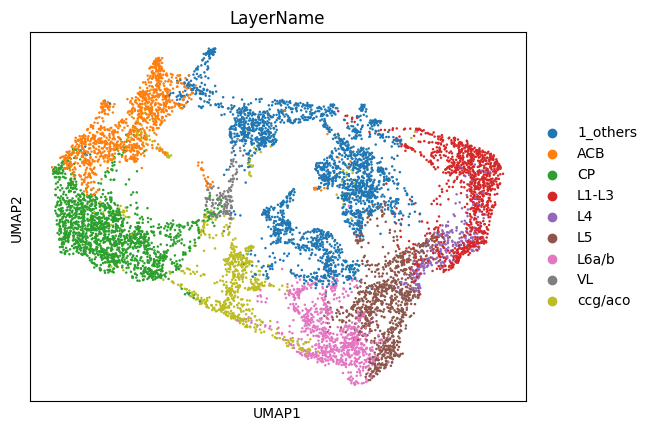

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load the final fused embeddings
adata_final = sc.read_h5ad('./embeddings/z_final_fused_gcn_20251127_142843.h5ad')

# UMAP visualization
sc.pp.neighbors(adata_final, use_rep='X')
sc.tl.umap(adata_final)
sc.pl.umap(adata_final, color='LayerName')  # Color by cell type

In [ ]:
import numpy as np

# Load modality-specific embeddings
z1 = np.load('./embeddings/z1_modality1_gcn_20251127_142843.npy')
z2 = np.load('./embeddings/z2_modality2_gcn_20251127_142843.npy')
z_final = np.load('./embeddings/z_final_fused_gcn_20251127_142843.npy')

# Compare correlations
from sklearn.metrics.pairwise import cosine_similarity
corr_z1 = cosine_similarity(z1, z_final).diagonal()
corr_z2 = cosine_similarity(z2, z_final).diagonal()

print(f"RNA contribution: {corr_z1.mean():.3f}")
print(f"ATAC contribution: {corr_z2.mean():.3f}")

RNA contribution: 0.943
ATAC contribution: 0.972


In [ ]:
import scanpy as sc

# Load final embeddings
adata_final = sc.read_h5ad('./embeddings/z_final_fused_gcn_20251127_142843.h5ad')

# Clustering
sc.pp.neighbors(adata_final, use_rep='X')
sc.tl.leiden(adata_final, resolution=0.8)

# Metrics
from sklearn.metrics import adjusted_rand_score
if 'LayerName' in adata_final.obs:
    ari = adjusted_rand_score(adata_final.obs['LayerName'], 
                              adata_final.obs['leiden'])
    print(f"ARI: {ari:.3f}")

/tmp/ipykernel_24542/3217885784.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_final, resolution=0.8)


ARI: 0.419
